# Install fred-api

In [1]:
!pip install fredapi > /dev/null

In [2]:
## pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install
%config Completer.use_jedi = False

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'put_your_key_here'

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("fred-api")


# 1.Create The Fred Object

In [4]:
fred = Fred(api_key=fred_key)

# 2.Search for economic data

In [5]:
sp_search = fred.search('S&P', order_by='popularity')

In [6]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-06-01,2022-06-01,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-05-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-05-31 08:39:02-05:00,96,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-06-01,2022-06-01,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-05-31 08:02:01-05:00,91,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-06-01,2022-06-01,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-05-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-05-31 08:39:06-05:00,85,This data represents the effective yield of th...
SP500,SP500,2022-06-01,2022-06-01,S&P 500,2012-06-01,2022-05-31,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-05-31 19:11:07-05:00,84,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2022-06-01,2022-06-01,Real Median Household Income in the United States,1984-01-01,2020-01-01,Annual,A,2020 CPI-U-RS Adjusted Dollars,2020 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2021-09-15 08:45:01-05:00,82,Household data are collected as of March. As ...


# 3. Pull Raw Data

In [7]:
sp500 = fred.get_series(series_id='SP500')

# 4. Plot Raw data

<AxesSubplot:title={'center':'SP500'}>

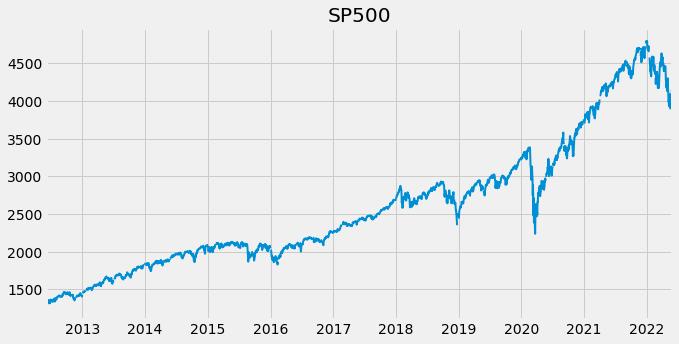

In [8]:
sp500.plot(figsize=(10,5), title='SP500', lw=2)

# 5. Pull and Join Multiple Data Series

In [9]:
unemp_results = fred.search('unemployment')

In [10]:
unrate = fred.get_series('UNRATE')

<AxesSubplot:>

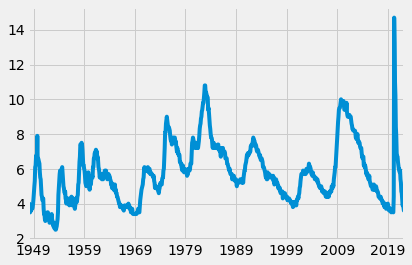

In [11]:
unrate.plot()

In [12]:
 fred.search('unemployment state')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-06-01,2022-06-01,Unemployment Rate,1948-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-06-01,2022-06-01,Unemployment Rate,1948-01-01,2022-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-05-06 07:43:03-05:00,54,The unemployment rate represents the number of...
NROU,NROU,2022-06-01,2022-06-01,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,69,"Starting with the July, 2021 report: An Update..."
LNS14000006,LNS14000006,2022-06-01,2022-06-01,Unemployment Rate - Black or African American,1972-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:05-05:00,67,The series comes from the 'Current Population ...
CCSA,CCSA,2022-06-01,2022-06-01,Continued Claims (Insured Unemployment),1967-01-07,2022-05-14,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-05-26 07:33:05-05:00,65,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VANORF5URN,VANORF5URN,2022-06-01,2022-06-01,"Unemployment Rate in Norfolk City, VA",1990-01-01,2022-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:22:08-05:00,8,These data come from the Current Population Su...
NCBURK0URN,NCBURK0URN,2022-06-01,2022-06-01,"Unemployment Rate in Burke County, NC",1990-01-01,2022-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:11:17-05:00,8,These data come from the Current Population Su...
LNS14100000,LNS14100000,2022-06-01,2022-06-01,Unemployment Rate Full-Time Workers,1968-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:49-05:00,8,The series comes from the 'Current Population ...


In [13]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))

In [14]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-06-01,2022-06-01,Unemployment Rate,1948-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-06-01,2022-06-01,Unemployment Rate,1948-01-01,2022-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-05-06 07:43:03-05:00,54,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2022-06-01,2022-06-01,Unemployment Rate - Black or African American,1972-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:05-05:00,67,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2022-06-01,2022-06-01,Unemployment Rate - Black or African American,1972-01-01,2022-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-05-06 07:43:11-05:00,25,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2022-06-01,2022-06-01,Unemployment Level,1948-01-01,2022-04-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-05-06 07:44:10-05:00,64,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IAPOLK3URN,IAPOLK3URN,2022-06-01,2022-06-01,"Unemployment Rate in Polk County, IA",1990-01-01,2022-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:14:07-05:00,5,These data come from the Current Population Su...
WIBROW9URN,WIBROW9URN,2022-06-01,2022-06-01,"Unemployment Rate in Brown County, WI",1990-01-01,2022-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:08:17-05:00,5,These data come from the Current Population Su...
CAMONT2URN,CAMONT2URN,2022-06-01,2022-06-01,"Unemployment Rate in Monterey County, CA",1990-01-01,2022-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:15:18-05:00,5,These data come from the Current Population Su...


# 6.filter down using query

In [15]:
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-06-01,2022-06-01,Unemployment Rate,1948-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:02-05:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2022-06-01,2022-06-01,Unemployment Rate - Black or African American,1972-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:05-05:00,67,The series comes from the 'Current Population ...
U6RATE,U6RATE,2022-06-01,2022-06-01,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:11-05:00,64,The series comes from the 'Current Population ...
LNS14000031,LNS14000031,2022-06-01,2022-06-01,"Unemployment Rate - 20 Yrs. & over, Black or A...",1972-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:15-05:00,57,The series comes from the 'Current Population ...
CAUR,CAUR,2022-06-01,2022-06-01,Unemployment Rate in California,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-23 14:57:01-05:00,56,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000089,LNS14000089,2022-06-01,2022-06-01,Unemployment Rate - 25-34 Yrs.,1948-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:55-05:00,6,The series comes from the 'Current Population ...
LNS13026511,LNS13026511,2022-06-01,2022-06-01,Job Losers Not on Layoff as a Percent of Total...,1967-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:59-05:00,6,The series comes from the 'Current Population ...
LNS13008397,LNS13008397,2022-06-01,2022-06-01,"Of Total Unemployed, Percent Unemployed Less T...",1948-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:52-05:00,6,The series comes from the 'Current Population ...


In [16]:
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"').shape

(157, 15)

In [17]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [18]:
unemp_df['title']

series id
UNRATE                                         Unemployment Rate
LNS14000006        Unemployment Rate - Black or African American
U6RATE         Total Unemployed, Plus All Persons Marginally ...
LNS14000031    Unemployment Rate - 20 Yrs. & over, Black or A...
CAUR                             Unemployment Rate in California
                                     ...                        
LNS14000089                       Unemployment Rate - 25-34 Yrs.
LNS13026511    Job Losers Not on Layoff as a Percent of Total...
LNS13008397    Of Total Unemployed, Percent Unemployed Less T...
LBSSA10              Labor Force Participation Rate for Delaware
LBSSA44          Labor Force Participation Rate for Rhode Island
Name: title, Length: 157, dtype: object

In [19]:
unemp_df['title'].str.contains('Unemployment Rate')

series id
UNRATE          True
LNS14000006     True
U6RATE         False
LNS14000031     True
CAUR            True
               ...  
LNS14000089     True
LNS13026511    False
LNS13008397    False
LBSSA10        False
LBSSA44        False
Name: title, Length: 157, dtype: bool

In [20]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')] 

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2022-06-01,2022-06-01,Unemployment Rate in California,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-23 14:57:01-05:00,56,None
FLUR,FLUR,2022-06-01,2022-06-01,Unemployment Rate in Florida,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-23 14:56:02-05:00,51,None
TXUR,TXUR,2022-06-01,2022-06-01,Unemployment Rate in Texas,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-23 14:56:03-05:00,49,None
NYUR,NYUR,2022-06-01,2022-06-01,Unemployment Rate in New York,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-23 14:56:03-05:00,45,None
OHUR,OHUR,2022-06-01,2022-06-01,Unemployment Rate in Ohio,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-23 14:56:04-05:00,41,None
PAUR,PAUR,2022-06-01,2022-06-01,Unemployment Rate in Pennsylvania,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-23 14:56:05-05:00,40,None
NJUR,NJUR,2022-06-01,2022-06-01,Unemployment Rate in New Jersey,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-23 14:56:20-05:00,23,None
WIUR,WIUR,2022-06-01,2022-06-01,Unemployment Rate in Wisconsin,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-23 14:56:09-05:00,37,None
MIUR,MIUR,2022-06-01,2022-06-01,Unemployment Rate in Michigan,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-23 14:56:06-05:00,34,None


In [21]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')].shape

(58, 15)

In [22]:
up_unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]

# loop to get the series ID's, and drop non- State ID's 

In [23]:
up_unemp_df.index

Index(['CAUR', 'FLUR', 'TXUR', 'NYUR', 'OHUR', 'PAUR', 'NJUR', 'WIUR', 'MIUR',
       'NCUR', 'ALUR', 'ILUR', 'WAUR', 'COUR', 'VAUR', 'MNUR', 'KYUR', 'MOUR',
       'IAUR', 'ORUR', 'TNUR', 'SCUR', 'GAUR', 'MAUR', 'NMUR', 'AZUR', 'INUR',
       'WVUR', 'LAUR', 'OKUR', 'NVUR', 'LASMT261982000000003', 'MDUR', 'ARUR',
       'UTUR', 'AKUR', 'MSUR', 'NEUR', 'NDUR', 'KSUR', 'LASMT391746000000003',
       'CTUR', 'HIUR', 'MTUR', 'SDUR', 'IDUR', 'RIUR', 'MEUR', 'NHUR', 'PRUR',
       'WYUR', 'VTUR', 'DEUR', 'DCUR', 'CNERUR', 'CWSTUR', 'CMWRUR', 'CNEWUR'],
      dtype='object', name='series id')

In [24]:
len(up_unemp_df.index)

58

In [25]:
all_results = []

for myid in up_unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [26]:
pd.concat(all_results, axis=1)

,CAUR,FLUR,TXUR,NYUR,OHUR,PAUR,NJUR,WIUR,MIUR,NCUR,ALUR,ILUR,WAUR,COUR,VAUR,MNUR,KYUR,MOUR,IAUR,ORUR,TNUR,SCUR,GAUR,MAUR,NMUR,AZUR,INUR,WVUR,LAUR,OKUR,NVUR,LASMT261982000000003,MDUR,ARUR,UTUR,AKUR,MSUR,NEUR,NDUR,KSUR,LASMT391746000000003,CTUR,HIUR,MTUR,SDUR,IDUR,RIUR,MEUR,NHUR,PRUR,WYUR,VTUR,DEUR,DCUR,CNERUR,CWSTUR,CMWRUR,CNEWUR
1976-01-01,9.2,9.7,5.8,10.3,8.1,8.0,10.3,5.8,9.9,6.4,6.6,6.6,8.5,5.8,6.1,6.0,5.6,5.9,4.3,9.5,6.0,7.4,8.4,10.5,8.6,10.2,6.6,7.5,6.3,5.8,9.2,NaN,6.4,7.3,5.8,7.1,6.7,3.3,3.4,4.2,NaN,9.8,9.8,5.8,3.3,5.6,7.8,8.7,6.5,19.6,4.1,8.6,8.0,8.7,9.6,8.6,6.8,9.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,8.1,10.3,5.8,9.9,6.4,6.6,6.6,8.5,5.7,6.1,6.0,5.6,5.9,4.3,9.5,6.0,7.4,8.4,10.5,8.7,10.2,6.6,7.5,6.3,5.8,9.2,NaN,6.4,7.3,5.9,7.1,6.7,3.3,3.4,4.2,NaN,9.8,9.8,5.8,3.3,5.6,7.8,8.7,6.5,19.5,4.1,8.6,8.0,8.7,9.6,8.6,6.8,9.6
1976-03-01,9.1,9.6,5.9,10.2,8.1,8.1,10.3,5.7,9.9,6.4,6.6,6.6,8.4,5.7,6.1,5.9,5.6,5.9,4.3,9.4,6.0,7.3,8.4,10.5,8.7,10.1,6.5,7.5,6.3,5.8,9.2,NaN,6.4,7.3,5.8,7.0,6.6,3.3,3.4,4.2,NaN,9.8,9.8,5.8,3.2,5.6,7.7,8.6,6.5,19.3,4.1,8.6,8.0,8.6,9.6,8.6,6.8,9.6
1976-04-01,9.1,9.5,5.9,10.2,8.0,8.1,10.3,5.6,9.8,6.3,6.5,6.6,8.5,5.6,6.0,5.8,5.6,6.0,4.2,9.2,6.0,7.2,8.3,10.3,8.6,10.0,6.3,7.5,6.4,5.8,9.0,NaN,6.4,7.2,5.8,6.9,6.4,3.2,3.5,4.2,NaN,9.6,9.7,5.8,3.1,5.6,7.7,8.6,6.5,19.0,4.0,8.6,8.1,8.5,9.5,8.5,6.7,9.4
1976-05-01,9.0,9.3,5.9,10.1,7.8,8.1,10.3,5.5,9.6,6.1,6.4,6.6,8.5,5.6,5.9,5.7,5.5,6.0,4.1,9.1,5.9,7.0,8.1,10.1,8.6,9.8,6.0,7.4,6.5,5.7,8.9,NaN,6.5,7.1,5.7,6.9,6.3,3.1,3.6,4.2,NaN,9.4,9.4,5.8,3.1,5.6,7.7,8.5,6.5,18.9,3.9,8.5,8.3,8.4,9.5,8.5,6.6,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,5.8,3.5,4.8,5.4,4.5,5.5,5.1,3.1,5.1,4.1,3.1,5.1,4.5,4.2,3.3,3.0,4.6,3.9,3.9,4.2,3.6,3.6,3.3,4.6,5.9,3.9,2.7,4.3,4.4,2.8,5.3,5.3,5.4,3.3,2.3,5.5,4.7,2.3,3.1,2.8,5.3,5.1,4.3,2.9,2.9,3.1,4.5,4.1,3.0,7.5,4.0,3.1,4.8,6.1,5.1,5.0,4.0,4.5
2022-01-01,5.7,3.5,4.8,5.3,4.3,5.4,5.1,3.0,4.9,3.9,3.1,5.0,4.4,4.2,3.3,2.9,4.4,3.8,3.7,4.2,3.5,3.5,3.2,4.8,5.9,3.7,2.4,4.1,4.3,2.7,5.2,5.1,5.4,3.2,2.2,5.6,4.6,2.2,3.1,2.6,5.3,5.3,4.3,2.7,2.8,3.0,4.2,4.1,2.9,7.1,3.8,3.0,4.8,6.3,5.1,4.8,3.8,4.6
2022-02-01,5.3,3.3,4.7,4.9,4.2,5.1,4.6,2.9,4.7,3.7,3.0,4.8,4.3,4.0,3.2,2.7,4.2,3.7,3.5,4.0,3.4,3.5,3.2,4.7,5.6,3.6,2.3,3.9,4.3,2.6,5.1,5.0,5.0,3.1,2.1,5.3,4.5,2.1,2.9,2.5,5.3,4.9,4.2,2.6,2.6,2.8,3.9,4.0,2.7,6.8,3.6,2.9,4.6,6.1,4.8,4.6,3.7,4.3
2022-03-01,4.8,3.2,4.4,4.6,4.1,4.9,4.2,2.8,4.4,3.5,2.9,4.7,4.1,3.7,3.0,2.5,4.0,3.6,3.3,3.8,3.2,3.4,3.1,4.3,5.3,3.3,2.2,3.7,4.2,2.7,5.0,4.7,4.6,3.1,2.0,4.9,4.2,2.0,2.9,2.4,5.4,4.6,4.1,2.3,2.5,2.7,3.4,3.6,2.4,6.5,3.4,2.6,4.5,6.0,4.5,4.3,3.5,4.0


In [27]:
unemp_results = pd.concat(all_results, axis=1).drop(['LASMT261982000000003','LASMT391746000000003','CNERUR','CMWRUR','CWSTUR','CNEWUR','PRUR'], axis=1)
id_to_state = up_unemp_df['title'].str.replace( 'Unemployment Rate in ','').to_dict()
unemp_results.columns = [ id_to_state[c] for c in unemp_results.columns]

In [28]:
unemp_results

,California,Florida,Texas,New York,Ohio,Pennsylvania,New Jersey,Wisconsin,Michigan,North Carolina,Alabama,Illinois,Washington,Colorado,Virginia,Minnesota,Kentucky,Missouri,Iowa,Oregon,Tennessee,South Carolina,Georgia,Massachusetts,New Mexico,Arizona,Indiana,West Virginia,Louisiana,Oklahoma,Nevada,Maryland,Arkansas,Utah,Alaska,Mississippi,Nebraska,North Dakota,Kansas,Connecticut,Hawaii,Montana,South Dakota,Idaho,Rhode Island,Maine,New Hampshire,Wyoming,Vermont,Delaware,the District of Columbia
1976-01-01,9.2,9.7,5.8,10.3,8.1,8.0,10.3,5.8,9.9,6.4,6.6,6.6,8.5,5.8,6.1,6.0,5.6,5.9,4.3,9.5,6.0,7.4,8.4,10.5,8.6,10.2,6.6,7.5,6.3,5.8,9.2,6.4,7.3,5.8,7.1,6.7,3.3,3.4,4.2,9.8,9.8,5.8,3.3,5.6,7.8,8.7,6.5,4.1,8.6,8.0,8.7
1976-02-01,9.2,9.7,5.8,10.3,8.1,8.1,10.3,5.8,9.9,6.4,6.6,6.6,8.5,5.7,6.1,6.0,5.6,5.9,4.3,9.5,6.0,7.4,8.4,10.5,8.7,10.2,6.6,7.5,6.3,5.8,9.2,6.4,7.3,5.9,7.1,6.7,3.3,3.4,4.2,9.8,9.8,5.8,3.3,5.6,7.8,8.7,6.5,4.1,8.6,8.0,8.7
1976-03-01,9.1,9.6,5.9,10.2,8.1,8.1,10.3,5.7,9.9,6.4,6.6,6.6,8.4,5.7,6.1,5.9,5.6,5.9,4.3,9.4,6.0,7.3,8.4,10.5,8.7,10.1,6.5,7.5,6.3,5.8,9.2,6.4,7.3,5.8,7.0,6.6,3.3,3.4,4.2,9.8,9.8,5.8,3.2,5.6,7.7,8.6,6.5,4.1,8.6,8.0,8.6
1976-04-01,9.1,9.5,5.9,10.2,8.0,8.1,10.3,5.6,9.8,6.3,6.5,6.6,8.5,5.6,6.0,5.8,5.6,6.0,4.2,9.2,6.0,7.2,8.3,10.3,8.6,10.0,6.3,7.5,6.4,5.8,9.0,6.4,7.2,5.8,6.9,6.4,3.2,3.5,4.2,9.6,9.7,5.8,3.1,5.6,7.7,8.6,6.5,4.0,8.6,8.1,8.5
1976-05-01,9.0,9.3,5.9,10.1,7.8,8.1,10.3,5.5,9.6,6.1,6.4,6.6,8.5,5.6,5.9,5.7,5.5,6.0,4.1,9.1,5.9,7.0,8.1,10.1,8.6,9.8,6.0,7.4,6.5,5.7,8.9,6.5,7.1,5.7,6.9,6.3,3.1,3.6,4.2,9.4,9.4,5.8,3.1,5.6,7.7,8.5,6.5,3.9,8.5,8.3,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,5.8,3.5,4.8,5.4,4.5,5.5,5.1,3.1,5.1,4.1,3.1,5.1,4.5,4.2,3.3,3.0,4.6,3.9,3.9,4.2,3.6,3.6,3.3,4.6,5.9,3.9,2.7,4.3,4.4,2.8,5.3,5.4,3.3,2.3,5.5,4.7,2.3,3.1,2.8,5.1,4.3,2.9,2.9,3.1,4.5,4.1,3.0,4.0,3.1,4.8,6.1
2022-01-01,5.7,3.5,4.8,5.3,4.3,5.4,5.1,3.0,4.9,3.9,3.1,5.0,4.4,4.2,3.3,2.9,4.4,3.8,3.7,4.2,3.5,3.5,3.2,4.8,5.9,3.7,2.4,4.1,4.3,2.7,5.2,5.4,3.2,2.2,5.6,4.6,2.2,3.1,2.6,5.3,4.3,2.7,2.8,3.0,4.2,4.1,2.9,3.8,3.0,4.8,6.3
2022-02-01,5.3,3.3,4.7,4.9,4.2,5.1,4.6,2.9,4.7,3.7,3.0,4.8,4.3,4.0,3.2,2.7,4.2,3.7,3.5,4.0,3.4,3.5,3.2,4.7,5.6,3.6,2.3,3.9,4.3,2.6,5.1,5.0,3.1,2.1,5.3,4.5,2.1,2.9,2.5,4.9,4.2,2.6,2.6,2.8,3.9,4.0,2.7,3.6,2.9,4.6,6.1
2022-03-01,4.8,3.2,4.4,4.6,4.1,4.9,4.2,2.8,4.4,3.5,2.9,4.7,4.1,3.7,3.0,2.5,4.0,3.6,3.3,3.8,3.2,3.4,3.1,4.3,5.3,3.3,2.2,3.7,4.2,2.7,5.0,4.6,3.1,2.0,4.9,4.2,2.0,2.9,2.4,4.6,4.1,2.3,2.5,2.7,3.4,3.6,2.4,3.4,2.6,4.5,6.0


In [29]:
unemp_results.isna().sum(axis=1)

1976-01-01    0
1976-02-01    0
1976-03-01    0
1976-04-01    0
1976-05-01    0
             ..
2021-12-01    0
2022-01-01    0
2022-02-01    0
2022-03-01    0
2022-04-01    0
Freq: MS, Length: 556, dtype: int64

In [30]:
# plot States Unemployment Rate 
px.line(unemp_results)


# April 2020 Unemployment Rate Per state

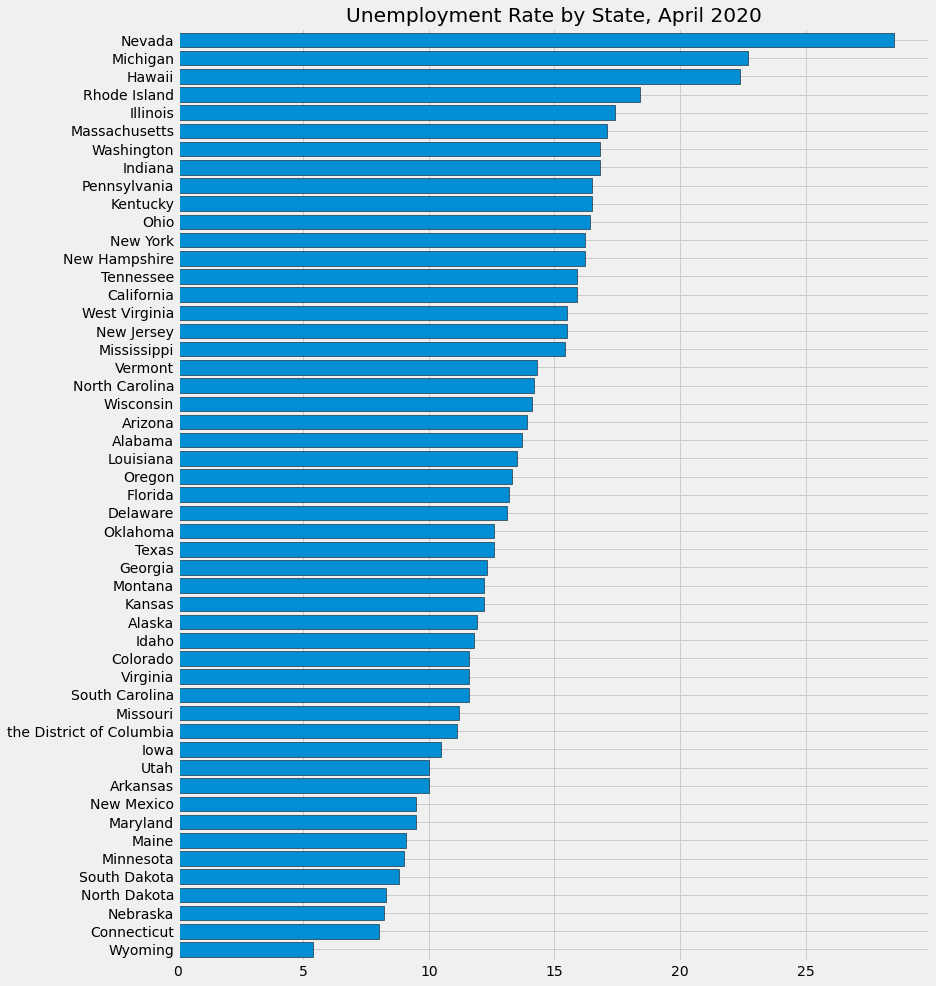

In [31]:
barchar = unemp_results.loc[unemp_results.index == '2020-04-01'].T \
.sort_values('2020-04-01') \
.plot(kind='barh', figsize=(12, 16), width= 0.8 , edgecolor='black', title='Unemployment Rate by State, April 2020')

barchar.legend().remove()

# Pull Participation Rate

In [32]:
part_df = fred.search('A states labor-force participation rate', filter=('frequency','Monthly')) 
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')


In [33]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2022-06-01,2022-06-01,Labor Force Participation Rate for California,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:02-05:00,27,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2022-06-01,2022-06-01,Labor Force Participation Rate for Florida,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:01-05:00,29,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2022-06-01,2022-06-01,Labor Force Participation Rate for Alabama,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:16-05:00,9,A state's labor-force participation rate is th...
LBSSA55,LBSSA55,2022-06-01,2022-06-01,Labor Force Participation Rate for Wisconsin,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:06-05:00,26,A state's labor-force participation rate is th...
LBSSA27,LBSSA27,2022-06-01,2022-06-01,Labor Force Participation Rate for Minnesota,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:03-05:00,26,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2022-06-01,2022-06-01,Labor Force Participation Rate for Kentucky,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:09-05:00,24,A state's labor-force participation rate is th...
LBSSA48,LBSSA48,2022-06-01,2022-06-01,Labor Force Participation Rate for Texas,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:05-05:00,23,A state's labor-force participation rate is th...
LBSSA36,LBSSA36,2022-06-01,2022-06-01,Labor Force Participation Rate for New York,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:04-05:00,22,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2022-06-01,2022-06-01,Labor Force Participation Rate for Michigan,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:08-05:00,20,A state's labor-force participation rate is th...


In [34]:
part_df.shape

(51, 15)

In [35]:
part_id_to_state = part_df['title'].str.replace( 'Labor Force Participation Rate for ','').to_dict()
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [ part_id_to_state[c] for c in part_states.columns]

In [36]:
part_states

,California,Florida,Alabama,Wisconsin,Minnesota,Kentucky,Texas,New York,Michigan,Pennsylvania,Georgia,West Virginia,Indiana,Illinois,Colorado,Ohio,South Carolina,Nebraska,Tennessee,Maryland,Utah,New Mexico,New Jersey,Arizona,Oregon,North Carolina,Kansas,Virginia,Washington,Massachusetts,Missouri,Arkansas,Iowa,Idaho,Nevada,South Dakota,Mississippi,Maine,Hawaii,Oklahoma,Louisiana,Connecticut,Alaska,North Dakota,Montana,New Hampshire,Wyoming,Vermont,Rhode Island,Delaware,District Of Columbia
1976-01-01,62.6,55.8,57.0,65.6,65.6,60.5,63.8,58.0,61.6,58.4,63.7,52.5,64.0,63.0,67.2,61.7,65.3,64.9,59.6,64.3,62.8,60.8,61.5,59.5,62.9,66.5,65.1,65.9,60.9,64.8,60.5,57.9,64.4,63.0,71.3,64.6,58.8,62.1,69.9,59.3,56.8,64.2,69.0,62.6,62.7,65.9,65.3,63.6,63.8,62.7,64.4
1976-02-01,62.4,55.7,56.9,65.5,65.5,60.3,63.5,58.0,61.5,58.3,63.6,52.4,63.9,63.0,67.0,61.7,65.2,64.9,59.4,64.2,62.6,60.5,61.4,59.2,62.7,66.3,65.0,65.8,60.7,64.7,60.3,57.8,64.3,62.8,70.8,64.4,58.6,61.9,69.6,59.2,56.6,64.1,68.4,62.4,62.5,65.6,64.9,63.4,63.7,62.5,64.5
1976-03-01,62.2,55.5,56.8,65.4,65.4,60.2,63.4,58.0,61.5,58.3,63.5,52.3,63.8,62.9,66.8,61.7,65.0,64.8,59.3,64.1,62.5,60.3,61.4,59.1,62.5,66.2,64.9,65.6,60.6,64.6,60.3,57.7,64.2,62.7,70.5,64.4,58.5,61.9,69.6,59.1,56.5,64.0,67.8,62.3,62.4,65.6,64.7,63.2,63.6,62.5,64.5
1976-04-01,62.2,55.5,56.8,65.4,65.4,60.1,63.5,58.0,61.6,58.3,63.5,52.3,63.8,62.9,66.6,61.6,64.9,64.8,59.3,64.1,62.5,60.3,61.5,59.1,62.4,66.2,65.0,65.5,60.6,64.6,60.4,57.7,64.1,62.7,70.4,64.3,58.5,61.8,69.4,59.0,56.4,64.1,67.9,62.5,62.3,65.7,64.9,63.5,63.7,62.4,64.5
1976-05-01,62.3,55.4,56.8,65.5,65.5,60.1,63.6,58.1,61.7,58.3,63.6,52.2,63.9,63.0,66.5,61.6,64.7,64.8,59.4,64.1,62.6,60.3,61.6,59.1,62.5,66.3,65.1,65.4,60.7,64.6,60.6,57.7,64.1,62.8,70.5,64.3,58.5,61.7,69.3,59.0,56.4,64.3,67.9,62.6,62.2,66.0,65.2,63.6,63.6,62.4,64.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,61.1,58.4,56.2,66.4,67.3,57.9,63.1,58.9,59.3,61.0,61.6,54.9,61.9,63.3,68.2,61.5,57.1,69.7,60.3,65.4,67.5,56.4,62.6,60.7,62.2,59.6,66.1,62.6,63.9,65.5,63.0,56.2,66.7,61.8,59.5,68.3,54.8,59.2,60.2,60.1,57.8,63.2,65.6,68.5,62.1,65.2,63.6,60.8,63.3,61.2,71.3
2022-01-01,61.5,58.6,56.4,66.4,67.6,58.0,63.3,59.1,59.4,61.1,61.8,55.0,61.9,63.7,68.5,61.5,57.1,69.7,60.3,65.6,67.5,56.6,62.7,60.7,62.6,59.7,66.1,62.9,64.2,65.8,63.1,56.3,66.8,61.8,59.5,68.4,54.9,59.3,60.4,60.1,58.0,63.6,66.0,68.8,62.1,65.2,63.7,60.9,63.2,61.3,71.7
2022-02-01,61.5,58.6,56.6,66.4,67.9,58.0,63.4,59.1,59.5,61.0,61.9,55.0,62.1,63.9,68.7,61.6,57.2,69.8,60.4,65.5,67.4,56.7,62.5,60.8,62.8,59.7,66.2,63.0,64.5,65.9,63.2,56.5,67.0,61.8,59.6,68.4,55.0,59.3,60.3,60.2,58.2,63.6,66.1,69.1,62.2,65.2,63.7,60.9,63.2,61.2,71.8
2022-03-01,61.7,58.8,56.8,66.5,68.1,58.1,63.4,59.1,59.6,61.2,62.1,55.0,62.4,64.2,68.9,61.7,57.2,69.8,60.6,65.6,67.6,56.7,62.4,60.7,63.0,59.8,66.2,63.3,64.8,66.0,63.3,56.6,67.2,62.0,59.7,68.5,55.2,59.2,60.3,60.4,58.6,64.0,66.0,69.2,62.3,65.3,63.6,61.2,63.2,61.2,72.1


# Plot Unemployment vs Participation

Text(0.5, 1.0, 'New York')

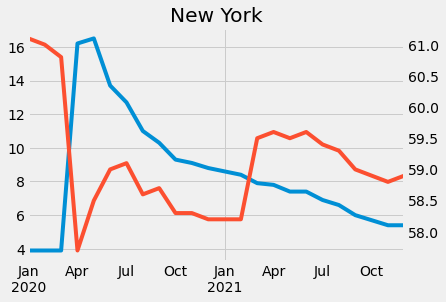

In [37]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemp_results.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax, label='Unemployment')
part_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title('New York')

# Itration of the code above to output 50 states plot.

In [38]:
#Fix DC
unemp_results = unemp_results.rename(columns={'the District of Columbia':'District of Columbia'})

In [39]:
unemp_results.columns

Index(['California', 'Florida', 'Texas', 'New York', 'Ohio', 'Pennsylvania',
       'New Jersey', 'Wisconsin', 'Michigan', 'North Carolina', 'Alabama',
       'Illinois', 'Washington', 'Colorado', 'Virginia', 'Minnesota',
       'Kentucky', 'Missouri', 'Iowa', 'Oregon', 'Tennessee', 'South Carolina',
       'Georgia', 'Massachusetts', 'New Mexico', 'Arizona', 'Indiana',
       'West Virginia', 'Louisiana', 'Oklahoma', 'Nevada', 'Maryland',
       'Arkansas', 'Utah', 'Alaska', 'Mississippi', 'Nebraska', 'North Dakota',
       'Kansas', 'Connecticut', 'Hawaii', 'Montana', 'South Dakota', 'Idaho',
       'Rhode Island', 'Maine', 'New Hampshire', 'Wyoming', 'Vermont',
       'Delaware', 'District of Columbia'],
      dtype='object')

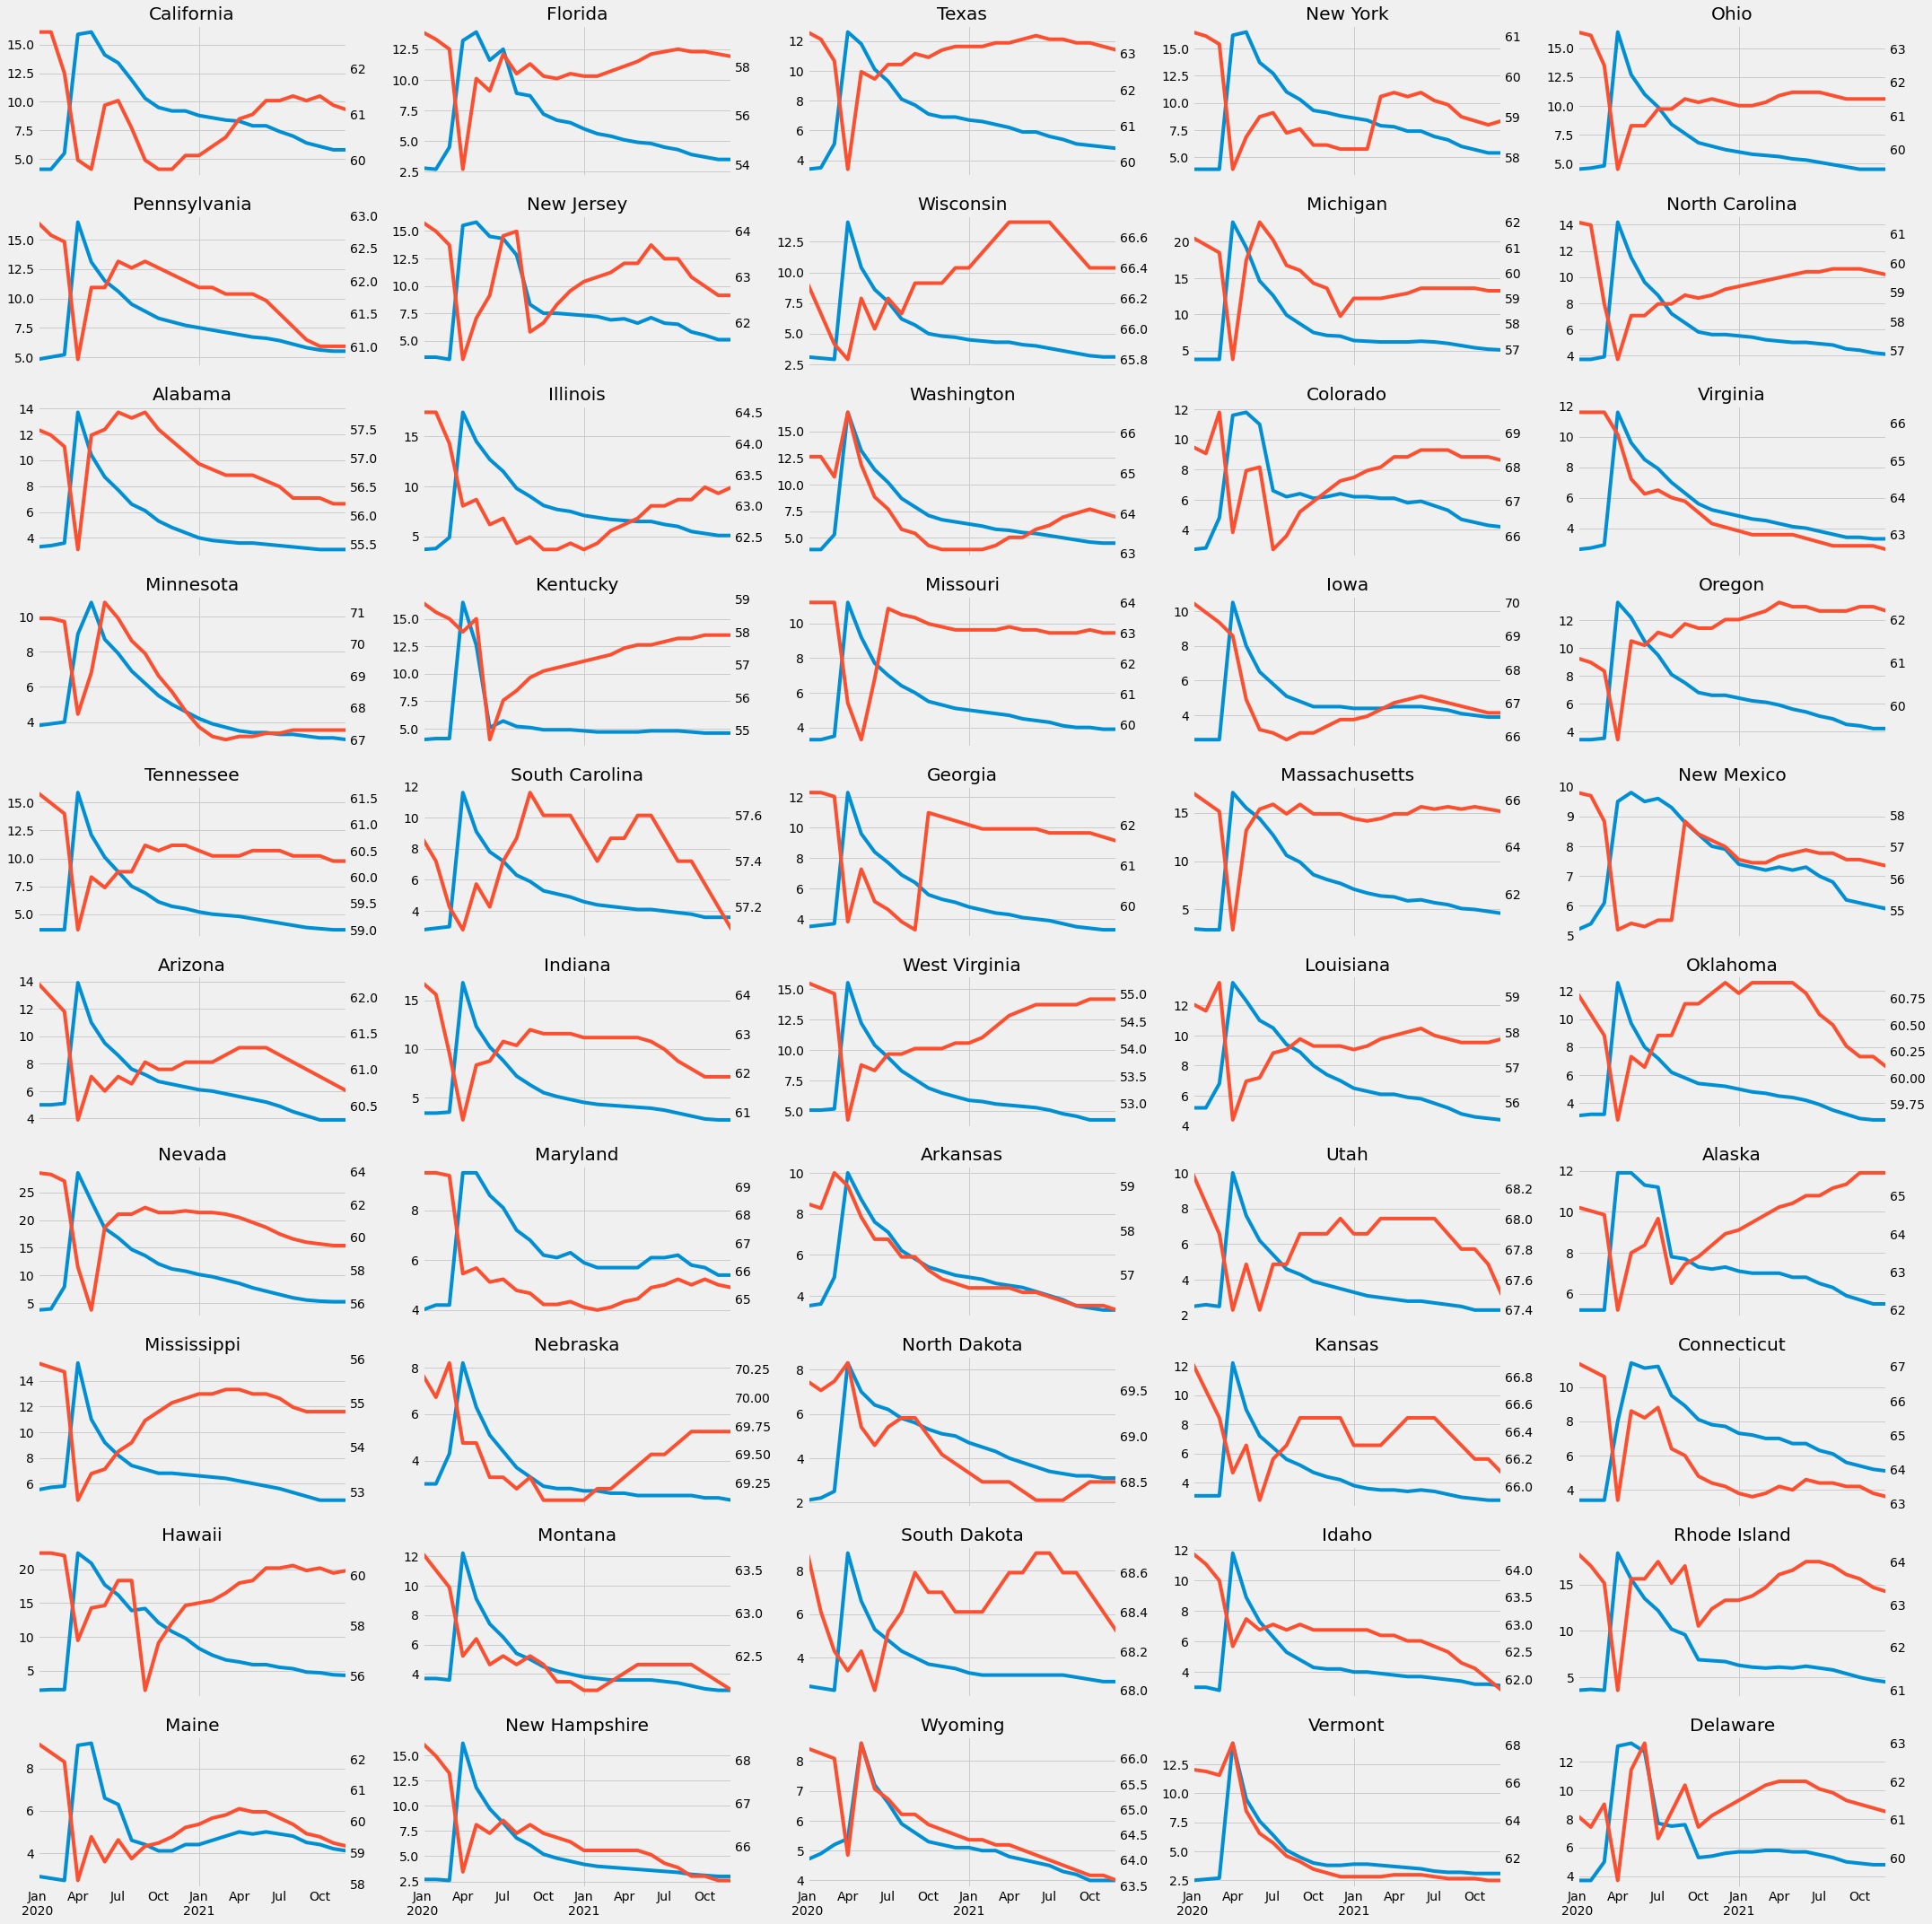

In [40]:
fig, axs = plt.subplots(10, 5, figsize=(30,30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_results.columns:
    if state == "District of Columbia":
        continue
    ax2 = axs[i].twinx()
    unemp_results.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    ax.set_title(state)
    axs[i].set_title(state)
    i += 1
    
plt.tight_layout()
plt.show()
